In [2]:
import pandas as pd

# Load the uploaded CSV file
df = pd.read_csv("sales_data.csv")

# Display first few rows
df.head()

,Date,Product,Region,Units_Sold,Unit_Price,Total_Sales
0,2024-05-03,Headphones,North,43,500,21500
1,2024-06-01,Keyboard,North,48,3000,144000
2,2024-02-01,Laptop,East,31,3000,93000
3,2024-02-29,Monitor,East,26,10000,260000
4,2024-04-10,Laptop,North,34,1500,51000


In [4]:
# Check basic information about the dataset
df.info()

# Check if there are any missing values
df.isnull().sum()

# Get basic statistics of numerical columns
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         100 non-null    object
 1   Product      100 non-null    object
 2   Region       100 non-null    object
 3   Units_Sold   100 non-null    int64 
 4   Unit_Price   100 non-null    int64 
 5   Total_Sales  100 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 4.8+ KB


,Units_Sold,Unit_Price,Total_Sales
count,100.000000,100.00000,1.000000e+02
mean,29.050000,11975.00000,3.651600e+05
std,13.212616,17644.26467,6.048512e+05
min,5.000000,500.00000,2.500000e+03
25%,17.000000,1500.00000,3.200000e+04
50%,31.000000,3000.00000,9.800000e+04
75%,40.000000,10000.00000,4.000000e+05
max,50.000000,50000.00000,2.500000e+06


In [8]:
# Fill missing numerical values with the column mean
df = df.fillna(df.mean(numeric_only=True))

# Remove duplicate rows if any
df = df.drop_duplicates()

# Confirm cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         100 non-null    object
 1   Product      100 non-null    object
 2   Region       100 non-null    object
 3   Units_Sold   100 non-null    int64 
 4   Unit_Price   100 non-null    int64 
 5   Total_Sales  100 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 4.8+ KB


In [10]:
# See exact column names and first rows
print("Columns:", df.columns.tolist())
display(df.head())

Columns: ['Date', 'Product', 'Region', 'Units_Sold', 'Unit_Price', 'Total_Sales']


,Date,Product,Region,Units_Sold,Unit_Price,Total_Sales
0,2024-05-03,Headphones,North,43,500,21500
1,2024-06-01,Keyboard,North,48,3000,144000
2,2024-02-01,Laptop,East,31,3000,93000
3,2024-02-29,Monitor,East,26,10000,260000
4,2024-04-10,Laptop,North,34,1500,51000


In [12]:
# --- pick the correct sales column ---
if 'Sales' in df.columns:
    sales_col = 'Sales'
elif 'Total_Sales' in df.columns:
    sales_col = 'Total_Sales'
else:
    # try common alternatives
    for alt in ['Amount','Revenue','Total','Sale']:
        if alt in df.columns:
            sales_col = alt
            break
    else:
        raise KeyError("No recognizable sales column found. Check df.columns output from the previous cell.")

print("Using sales column:", sales_col)

# Ensure sales column is numeric
df[sales_col] = pd.to_numeric(df[sales_col], errors='coerce')

# Basic stats
total_sales = df[sales_col].sum(skipna=True)
avg_sales = df[sales_col].mean(skipna=True)

print("\nTotal Sales:", total_sales)
print("Average Sales:", avg_sales)

# Top 5 products by total sales (if Product column exists)
if 'Product' in df.columns:
    top_products = df.groupby('Product')[sales_col].sum().sort_values(ascending=False).head(5)
    print("\nTop 5 Products by Sales:\n", top_products)
else:
    print("\nNo 'Product' column found to compute top products.")

# Sales by Region (if Region column exists)
if 'Region' in df.columns:
    sales_by_region = df.groupby('Region')[sales_col].sum().sort_values(ascending=False)
    print("\nSales by Region:\n", sales_by_region)
else:
    print("\nNo 'Region' column found to compute sales by region.")

Using sales column: Total_Sales

Total Sales: 36516000
Average Sales: 365160.0

Top 5 Products by Sales:
 Product
Mouse         8078000
Printer       7602500
Keyboard      7476500
Headphones    5662500
Monitor       5278500
Name: Total_Sales, dtype: int64

Sales by Region:
 Region
North    12912500
West      9648500
East      8329500
South     5625500
Name: Total_Sales, dtype: int64


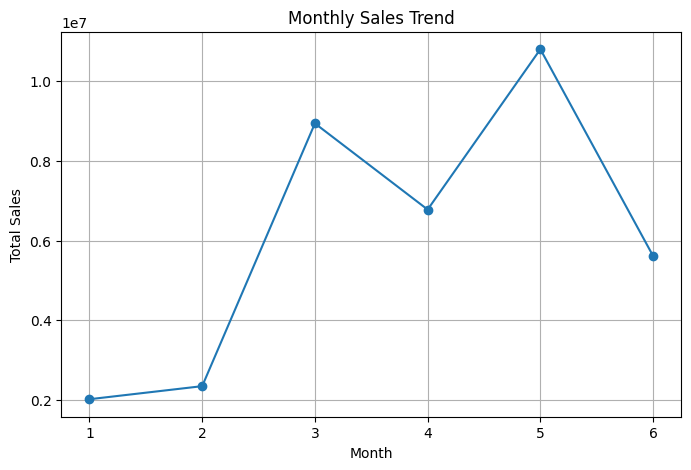

In [16]:
import matplotlib.pyplot as plt

# proceed only if Date column exists
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    monthly = df.groupby(df['Date'].dt.month)[sales_col].sum()

    plt.figure(figsize=(8,5))
    plt.plot(monthly.index, monthly.values, marker='o')
    plt.xticks(monthly.index)
    plt.xlabel("Month")
    plt.ylabel("Total Sales")
    plt.title("Monthly Sales Trend")
    plt.grid(True)
    plt.show()
else:
    print("No 'Date' column found — can't plot monthly trend.")

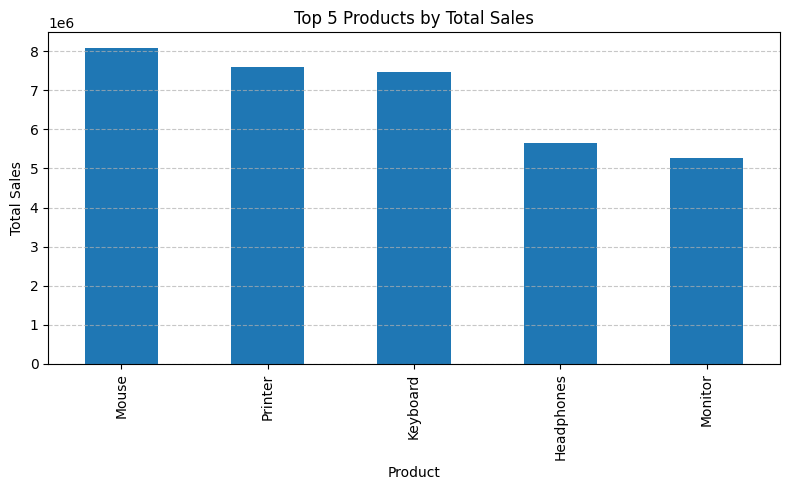

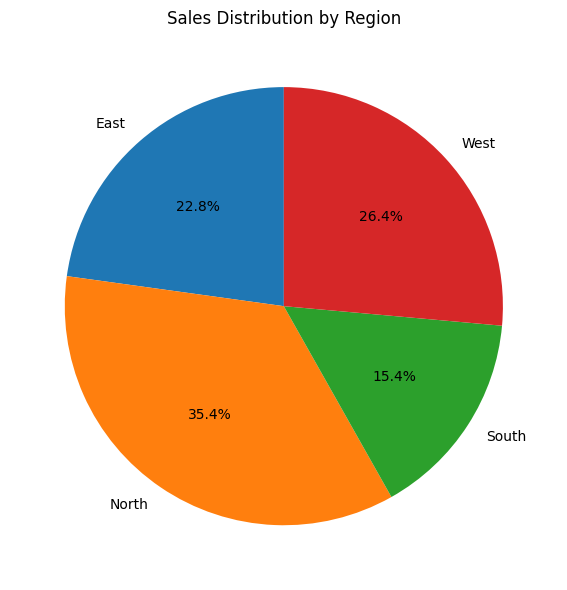

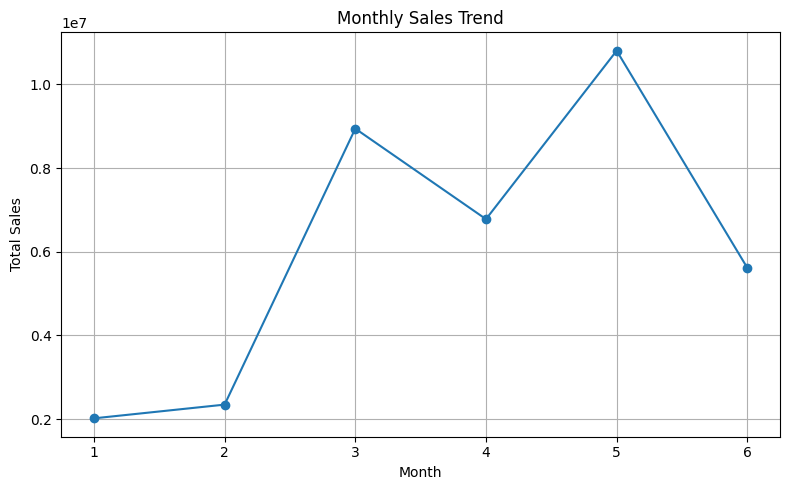

In [17]:
# Robust plotting block — safe to run
import pandas as pd
import matplotlib.pyplot as plt

# Ensure column names are lowercase (your CSV uses lowercase)
df.columns = [c.strip().lower() for c in df.columns]

# Pick the sales column (handle common variants)
if 'total_sales' in df.columns:
    sales_col = 'total_sales'
elif 'sales' in df.columns:
    sales_col = 'sales'
else:
    # try some alternatives
    for alt in ['amount','revenue','total','sale']:
        if alt in df.columns:
            sales_col = alt
            break
    else:
        raise KeyError("No recognizable sales column found. Check df.columns output.")

# Ensure numeric sales column
df[sales_col] = pd.to_numeric(df[sales_col], errors='coerce')

# Drop rows where sales is NaN (can't plot them)
df = df.dropna(subset=[sales_col])

# 1) Bar chart – Top 5 products by total sales (if product exists)
if 'product' in df.columns:
    top_products = df.groupby('product')[sales_col].sum().sort_values(ascending=False).head(5)
    if not top_products.empty:
        plt.figure(figsize=(8,5))
        top_products.plot(kind='bar')
        plt.title('Top 5 Products by Total Sales')
        plt.xlabel('Product')
        plt.ylabel('Total Sales')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()
    else:
        print("No product-grouped sales to plot (top_products is empty).")
else:
    print("No 'product' column found — skipping product bar chart.")

# 2) Pie chart – Sales by region (if region exists)
if 'region' in df.columns:
    sales_by_region = df.groupby('region')[sales_col].sum()
    if not sales_by_region.empty:
        plt.figure(figsize=(6,6))
        plt.pie(sales_by_region, labels=sales_by_region.index, autopct='%1.1f%%', startangle=90)
        plt.title('Sales Distribution by Region')
        plt.tight_layout()
        plt.show()
    else:
        print("No region-grouped sales to plot (sales_by_region is empty).")
else:
    print("No 'region' column found — skipping region pie chart.")

# 3) Line chart – Monthly sales trend (if date exists)
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    # drop rows where date couldn't be parsed
    df = df.dropna(subset=['date'])
    monthly_sales = df.groupby(df['date'].dt.month)[sales_col].sum().sort_index()
    if not monthly_sales.empty:
        plt.figure(figsize=(8,5))
        plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
        plt.title('Monthly Sales Trend')
        plt.xlabel('Month')
        plt.ylabel('Total Sales')
        plt.xticks(monthly_sales.index)
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    else:
        print("Monthly sales data empty — nothing to plot.")
else:
    print("No 'date' column found — skipping monthly trend plot.")

# Optional: save the figures to files (uncomment if you want to save)
# plt.savefig('chart.png', dpi=150, bbox_inches='tight')